In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.grimoire as Grimoire
from src.grimoire import By
import src.decks as Decks


In [3]:
commander = "Teysa Karlov"
# grim = Grimoire.Grimoire(omnicomprehensive=True)
Decks.fetch(By.COMMANDER, commander,do_load=False,upper_limit=400)
grim = Grimoire.fetch(By.COMMANDER,commander)


Salvati 400 mazzi in commanders/Teysa Karlov.pkl da Archidekt - 59.97 kB
trovati 400 mazzi da fetchare per Teysa Karlov
Salvate 5619 carte in commanders/Teysa Karlov.pkl da Archidekt - 4658.61 kB


In [4]:
from src.card import Filters
# Crea la matrice di correlazione
df = grim.dataframe( 
    positive_filters=[
        Filters.isLegalInCommander,
        # Filters.isCreature,
        # Filters.isGreen
        # Filters.isColorless
    ], 
    negative_filters=[
        Filters.isToken
        # Filters.isLegendary
    ],
    additional_data={
        # "is_creature": lambda card: int(Type.Creature.name in card.types),
        # "#keywords" : lambda card: len(card.keywords),
        # "#words" : lambda card: card.text.count(' ')+1,
        # "is_green": lambda card: int(card.color_identity['G']),
        # "is_black": lambda card: int(card.color_identity['B']),
        # "is_colorless": lambda card: int(all(not v for v in card.color_identity.values())),
        "is_legendary": lambda card: int("Legendary" in card.super_types),
        "#act_abilities": lambda card: int(card.count_active_abilities()),
        "#trigg_abilities": lambda card: int(card.count_trigger_abilities()),
        "#mana_production": lambda card: int(card.count_mana_production())
    })

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = df.copy()
scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
df_scaled[numeric_cols] =  scaler.fit_transform(df[numeric_cols])
correlation_matrix = df_scaled.corr()

In [6]:
grim.remove(9092494)

False

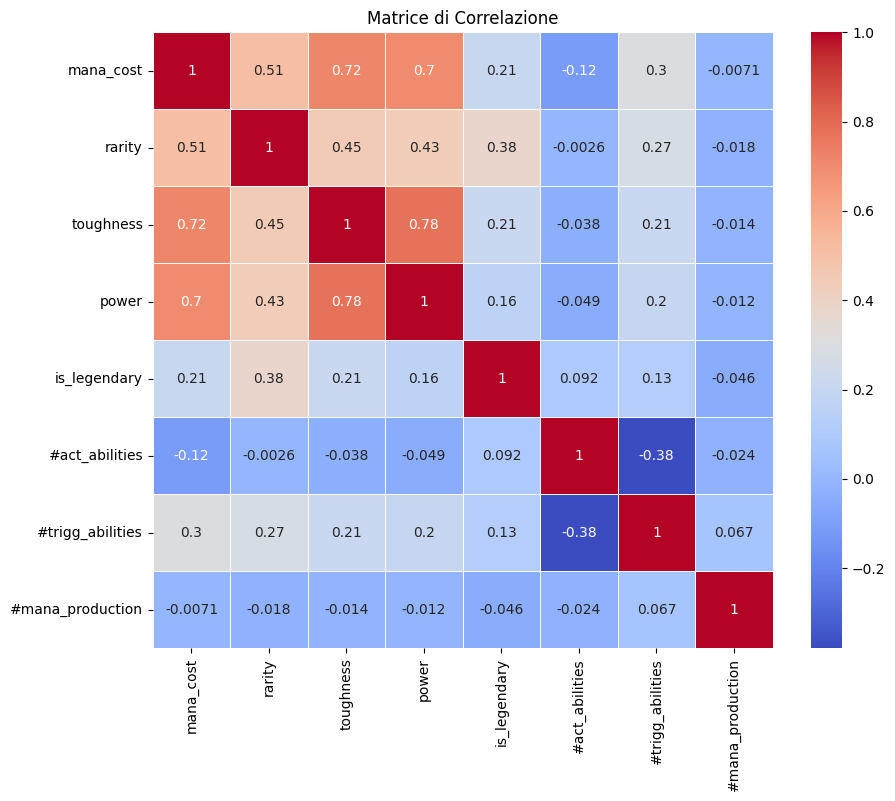

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Opzionalmente, crea una heatmap per visualizzare meglio la correlazione
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()


In [8]:
vectors = grim.vectorize()

# def percentuale(count):
#     return round(count/len(grim)*100,2)

# print(f'Su un totale di {len(grim)} carte:')
# for term, count in vectors.items():
#     space = ' ' if len(str(percentuale(count))) <5 else ''
#     print(f'{space}{percentuale(count)}%: {count} sono {term}')

In [9]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np


# Funzione per aggiornare la heatmap
def update_heatmap(limit):
    # Crea una maschera booleana per nascondere le annotazioni non significative
    mask_annot = (correlation_matrix < -limit) | (correlation_matrix > limit)

    # Crea una matrice di annotazioni, sostituendo i valori non significativi con NaN
    annot = np.where(mask_annot, np.round(correlation_matrix, 2), np.nan)

    # Stampa la heatmap senza annotazioni per le celle non significative
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, mask=np.isnan(annot))
    plt.title(f'Heatmap with Limit: {limit}')
    plt.show()

# Crea un widget per limit
limit_slider = widgets.FloatSlider(value=0.15, min=0.00, max=0.23, step=0.001, description='Limit:')


# # Mostra la heatmap iniziale
# update_heatmap(limit_slider.value)

# Collega il widget alla funzione di aggiornamento
widgets.interactive(update_heatmap, limit=limit_slider)

interactive(children=(FloatSlider(value=0.15, description='Limit:', max=0.23, step=0.001), Output()), _dom_cla…

In [10]:


from src.similarity import SimilarityMethod as SimMeth
import importlib
importlib.reload(Grimoire)

vector_matrix = Grimoire.precompute_vectors(grim)


In [11]:

methods = [SimMeth.COSINE, SimMeth.EUCLIDEAN, SimMeth.PEARSON_CORRELATION]
matrices, times = Grimoire.similarity_matrix(vector_matrix,methods)

/home/axten/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/axten/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/axten/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/axten/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/axten/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [12]:
print(times)

[2.6687755584716797, 1.209200382232666, 4.723540782928467]


In [13]:
for i, matrix in enumerate(matrices):
    print(f"{matrix}\n\n")

[[1.         0.26745994 0.27746128 ... 0.         0.         0.26904726]
 [0.26745994 1.         0.19883381 ... 0.03206219 0.         0.20118695]
 [0.27746128 0.19883381 1.         ... 0.06375047 0.         0.1176552 ]
 ...
 [0.         0.03206219 0.06375047 ... 1.         0.         0.03225247]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.26904726 0.20118695 0.1176552  ... 0.03225247 0.         1.        ]]


[[ 0.         11.22497216 11.18033989 ... 13.78404875  9.38083152
  11.18033989]
 [11.22497216  0.         11.70469991 ... 13.49073756  9.2736185
  11.61895004]
 [11.18033989 11.70469991  0.         ... 13.3041347   9.32737905
  12.24744871]
 ...
 [13.78404875 13.49073756 13.3041347  ...  0.         10.19803903
  13.45362405]
 [ 9.38083152  9.2736185   9.32737905 ... 10.19803903  0.
   9.21954446]
 [11.18033989 11.61895004 12.24744871 ... 13.45362405  9.21954446
   0.        ]]


[[        nan -0.73251537 -0.7225323  ... -1.         -1.
  -0.730896

In [14]:
matrix = matrices[0]
rows, cols = matrix.shape

if rows != cols:
    raise ValueError("La matrice non è quadrata.")
if not (matrix == matrix.T).all():
    raise ValueError("La matrice non è simmetrica.")
if (matrix < 0).any():
    raise ValueError("La matrice contiene valori negativi.")

In [15]:

# import imageio.v2 as imageio
# # Definisci i limiti per la GIF
# limits = np.arange(0, 0.24, 0.01)

# # Lista per salvare i frame
# frames = []

# # Genera i frame
# for limit in limits:
#     plt.figure(figsize=(10, 8))
    
#     # Crea una maschera booleana per nascondere le annotazioni non significative
#     mask_annot = (correlation_matrix < -limit) | (correlation_matrix > limit)

#     # Crea una matrice di annotazioni
#     annot = np.where(mask_annot, np.round(correlation_matrix, 2), np.nan)

#     # Stampa la heatmap
#     sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, mask=np.isnan(annot))
#     plt.title(f'Heatmap with Limit: {limit:.2f}')
    
#     # Salva il frame come immagine
#     plt.savefig(f'frame_{limit:.2f}.png')
#     plt.close()

#     # Aggiungi il frame alla lista
#     frames.append(imageio.imread(f'frame_{limit:.2f}.png'))

# # Crea una GIF animata
# imageio.mimsave('heatmap_animation.gif', frames, duration=4)

# # Rimuovi le immagini temporanee (opzionale)
# import os
# for limit in limits:
#     os.remove(f'frame_{limit:.2f}.png')

# print("GIF animata creata: heatmap_animation.gif")

In [16]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform, pdist

deck_ids = list(grim.get_all_deck_ids())
threshold = 0.4
distanze = 1 - matrix

model = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None)
labels = model.fit_predict(distanze)
distanze_condensate = sch.linkage(squareform(distanze), method='complete')

# Numero di cluster
n_clusters = len(set(labels))
print(f"Numero di cluster: {n_clusters}")

# # Visualizza il dendrogramma
# plt.figure(figsize=(80, 7))
# dendrogram = sch.dendrogram(distanze_condensate, labels=deck_ids)
# plt.axhline(y=threshold, color='r', linestyle='--')  # Imposta una soglia per tagliare i cluster
# plt.xlabel('Mazzi di carte')  # Aggiungi una label all'asse x
# plt.ylabel('Distanza')  # Aggiungi una label all'asse y
# plt.show()

Numero di cluster: 387


/home/axten/.local/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Numero di cluster dal dendrogramma: 379
Numero di cluster dal dendrogramma: 382
Numero di cluster dal dendrogramma: 382
Numero di cluster dal dendrogramma: 382
Numero di cluster dal dendrogramma: 379
Numero di cluster dal dendrogramma: 379


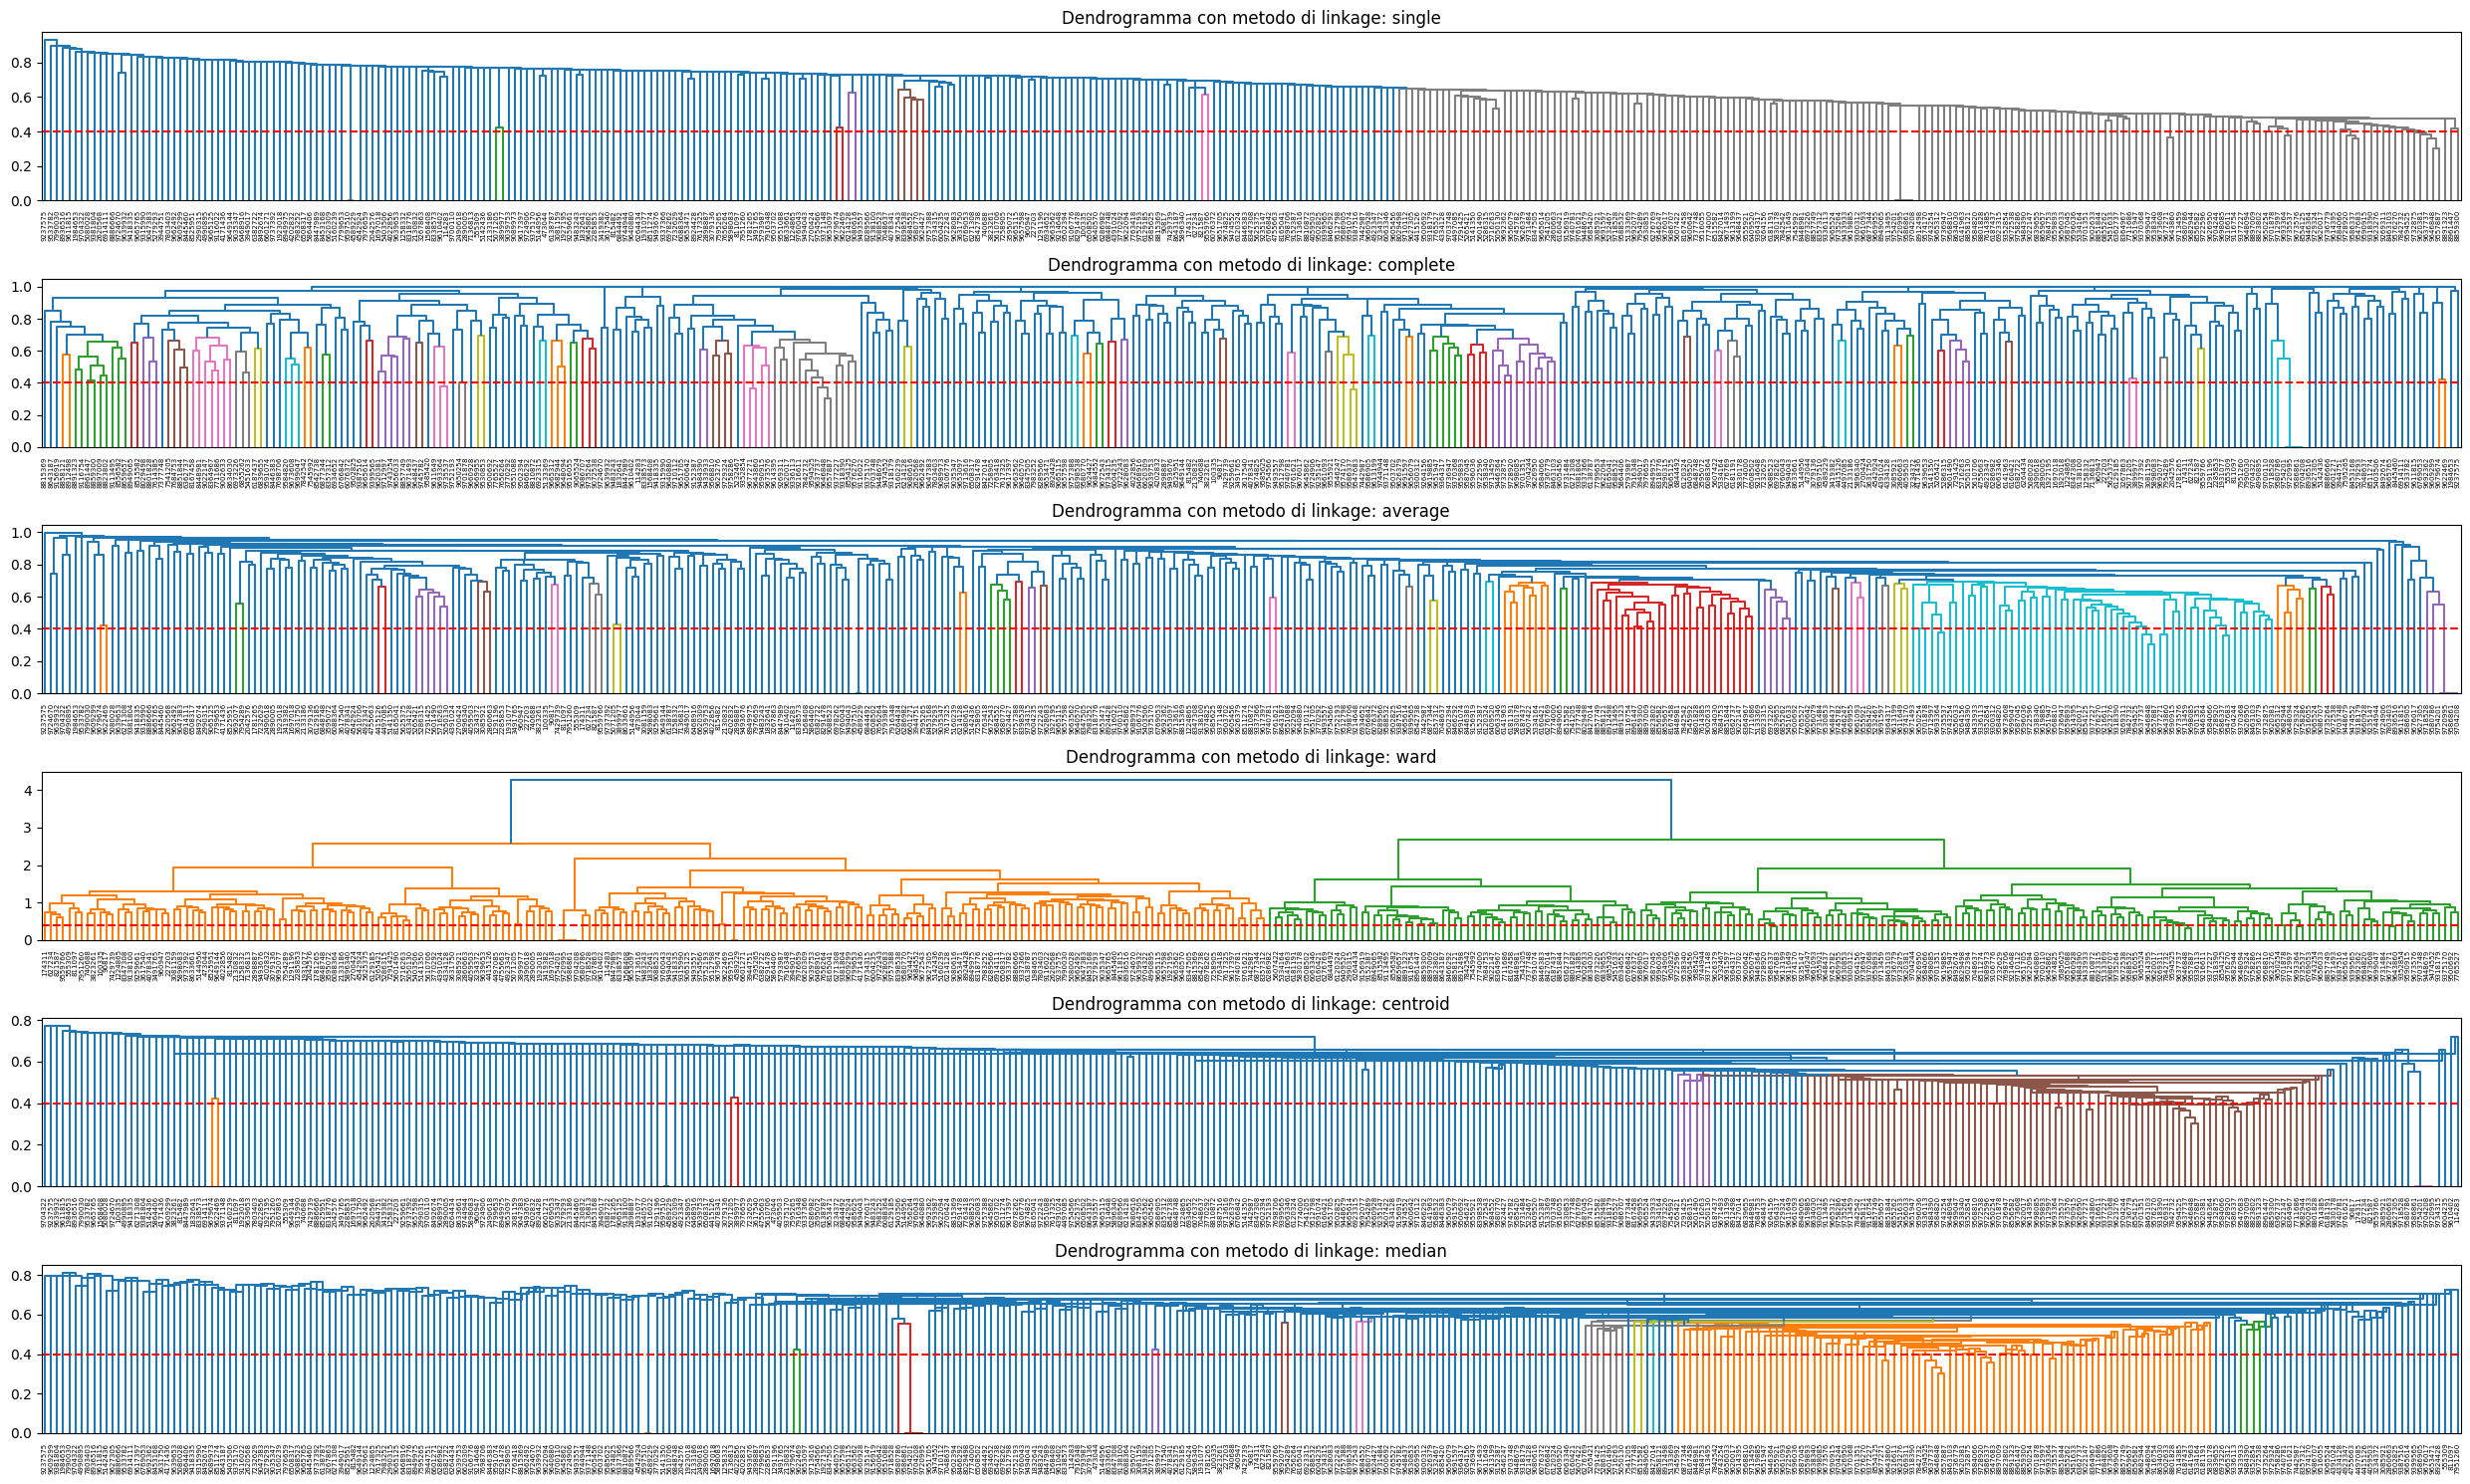

In [17]:

# Lista dei metodi di linkage
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid', 'median']

# Crea i grafici
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(25, 15))  # Un grafico per ogni metodo di linkage

for i, method in enumerate(linkage_methods):
    # Calcola la matrice di linkage per il metodo corrente
    distanze_condensate = sch.linkage(squareform(distanze), method=method)
    
    # Disegna il dendrogramma
    sch.dendrogram(distanze_condensate, ax=axs[i], labels=deck_ids)
    axs[i].set_title(f'Dendrogramma con metodo di linkage: {method}')
    axs[i].axhline(y=threshold, color='r', linestyle='--')  # Imposta una soglia per tagliare i cluster

    # Taglia il dendrogramma a una certa altezza
    cluster_labels = sch.fcluster(distanze_condensate, t=threshold, criterion='distance')

    # Calcola il numero di cluster dal dendrogramma
    n_clusters_from_dendrogram = len(set(cluster_labels))
    print(f"Numero di cluster dal dendrogramma: {n_clusters_from_dendrogram}")

plt.tight_layout()  # Ottimizza la disposizione
plt.show()

In [18]:

# Stampa le etichette dei cluster per ogni punto
print("Etichette dei cluster:", labels)

# 4. Visualizza i dati e i cluster
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 5. Visualizzazione del dendrogramma
linked = linkage(data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Indice dei punti')
plt.ylabel('Distanza')
plt.show()

Etichette dei cluster: [330 329 340 286 201 212 358 337 375 364 259 379 223 193 273 347 333 327
 285 359 196 335 287 263 281 305 325 218 225   0 360 366 316 328 282 341
 261 338 226 339 309 215 323 303 229 264 270 334 353 284 219 276 247 377
 357 231 245 209 168 348 326 386 251 351 336 162 269 319 294 169 363 361
 381 295 354 167 260 163 308 234 317 207 382 224 239 368 383 166 202 204
 302 345 331 253 297 262 233 131 376 306 252 238 312 249 324 214   2 227
 332 370 178 244 372 310 315 271 240 222 352 313 206 299 362 367 236 213
 301 175 342 346 265 199 216 187 374 190 318 292  83 355 211 298 154 150
 369   0 250 304 221 184 275 173 170 164 288 243 385 314 322 237 279 307
 134 197 111 112 378 157 198 129 257 230 365 192 248 350 210 119 380 274
 195 205 165 283 266 208 293 148 384 232 278 321 180  98 176 349 255 130
  87 152 272 188 220 179 228 290  81 123 356 103 311 256  84 104 280 113
 343 105 177 289 161 127 373 100 344   0 246 183  80 191  51 153 107 139
  91 320 135 300 277 258  76

NameError: name 'data' is not defined

In [12]:
# Controlla se ci sono valori negativi
if np.any(matrix > 1):
    print("La matrice di distanze contiene valori negativi.")

In [ ]:

from sklearn.metrics import silhouette_score
# Calcola il silhouette score
score = silhouette_score(distanze, labels, metric='precomputed')
print(f'Silhouette Score: {score:.3f}')

In [ ]:

from scipy.cluster.hierarchy import linkage

# Clustering agglomerativo
Z = linkage(distanze, method='average')

# Calcola le distanze per il metodo del gomito
max_distanze = []
for i in range(1, len(matrix)):
    # Aggiungi la distanza massima dal dendrogramma
    max_distanze.append(max(Z[:i, 2]))

# Grafico del metodo del gomito
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(matrix)), max_distanze, marker='o')
plt.title('Metodo del Gomito per Clustering Agglomerativo')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Distanza Massima')
plt.grid()
plt.show()